In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data = pd.read_csv('../data/SeoulBikeData_utf8.csv')
data.columns= [x.lower() for x in data.columns]
data["date"]=pd.to_datetime(data["date"],format="%d/%m/%Y")
data.shape

(8760, 14)

In [11]:
data.columns

Index(['date', 'rented bike count', 'hour', 'temperature(c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day'],
      dtype='object')

In [23]:
target="rented bike count"
x_cols= [x for x in data.columns  if x != target]


In [21]:
data["date"].dtype ==int

False

In [5]:
data.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   
3 2017-12-01                107     3            -6.2           40   
4 2017-12-01                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [38]:
data.dtypes

date                        datetime64[ns]
rented bike count                    int64
hour                                 int64
temperature(c)                     float64
humidity(%)                          int64
wind speed (m/s)                   float64
visibility (10m)                     int64
dew point temperature(c)           float64
solar radiation (mj/m2)            float64
rainfall(mm)                       float64
snowfall (cm)                      float64
seasons                             object
holiday                             object
functioning day                     object
dtype: object

# Estadisticas descriptivas

In [7]:
data.describe()

Date  Rented Bike Count         Hour  \
count                           8760        8760.000000  8760.000000   
mean   2018-05-31 23:59:59.999999744         704.602055    11.500000   
min              2017-12-01 00:00:00           0.000000     0.000000   
25%              2018-03-02 00:00:00         191.000000     5.750000   
50%              2018-06-01 00:00:00         504.500000    11.500000   
75%              2018-08-31 00:00:00        1065.250000    17.250000   
max              2018-11-30 00:00:00        3556.000000    23.000000   
std                              NaN         644.997468     6.922582   

       Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count     8760.000000  8760.000000       8760.000000       8760.000000   
mean        12.882922    58.226256          1.724909       1436.825799   
min        -17.800000     0.000000          0.000000         27.000000   
25%          3.500000    42.000000          0.900000        940.000000   
50%         13.700000    57.000000          1.500000       1698.000000   
75%         22.500000    74.000000          2.300000       2000.000000   
max         39.400000    98.000000          7.400000       2000.000000   
std         11.944825    20.362413          1.036300        608.298712   

       Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count               8760.000000              8760.000000   8760.000000   
mean                   4.073813                 0.569111      0.148687   
min                  -30.600000                 0.000000      0.000000   
25%                   -4.700000                 0.000000      0.000000   
50%                    5.100000                 0.010000      0.000000   
75%                   14.800000                 0.930000      0.000000   
max                   27.200000                 3.520000     35.000000   
std                   13.060369                 0.868746      1.128193   

       Snowfall (cm)  
count    8760.000000  
mean        0.075068  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         8.800000  
std         0.436746

### Histogramas por cada variable y dispersión entre variables

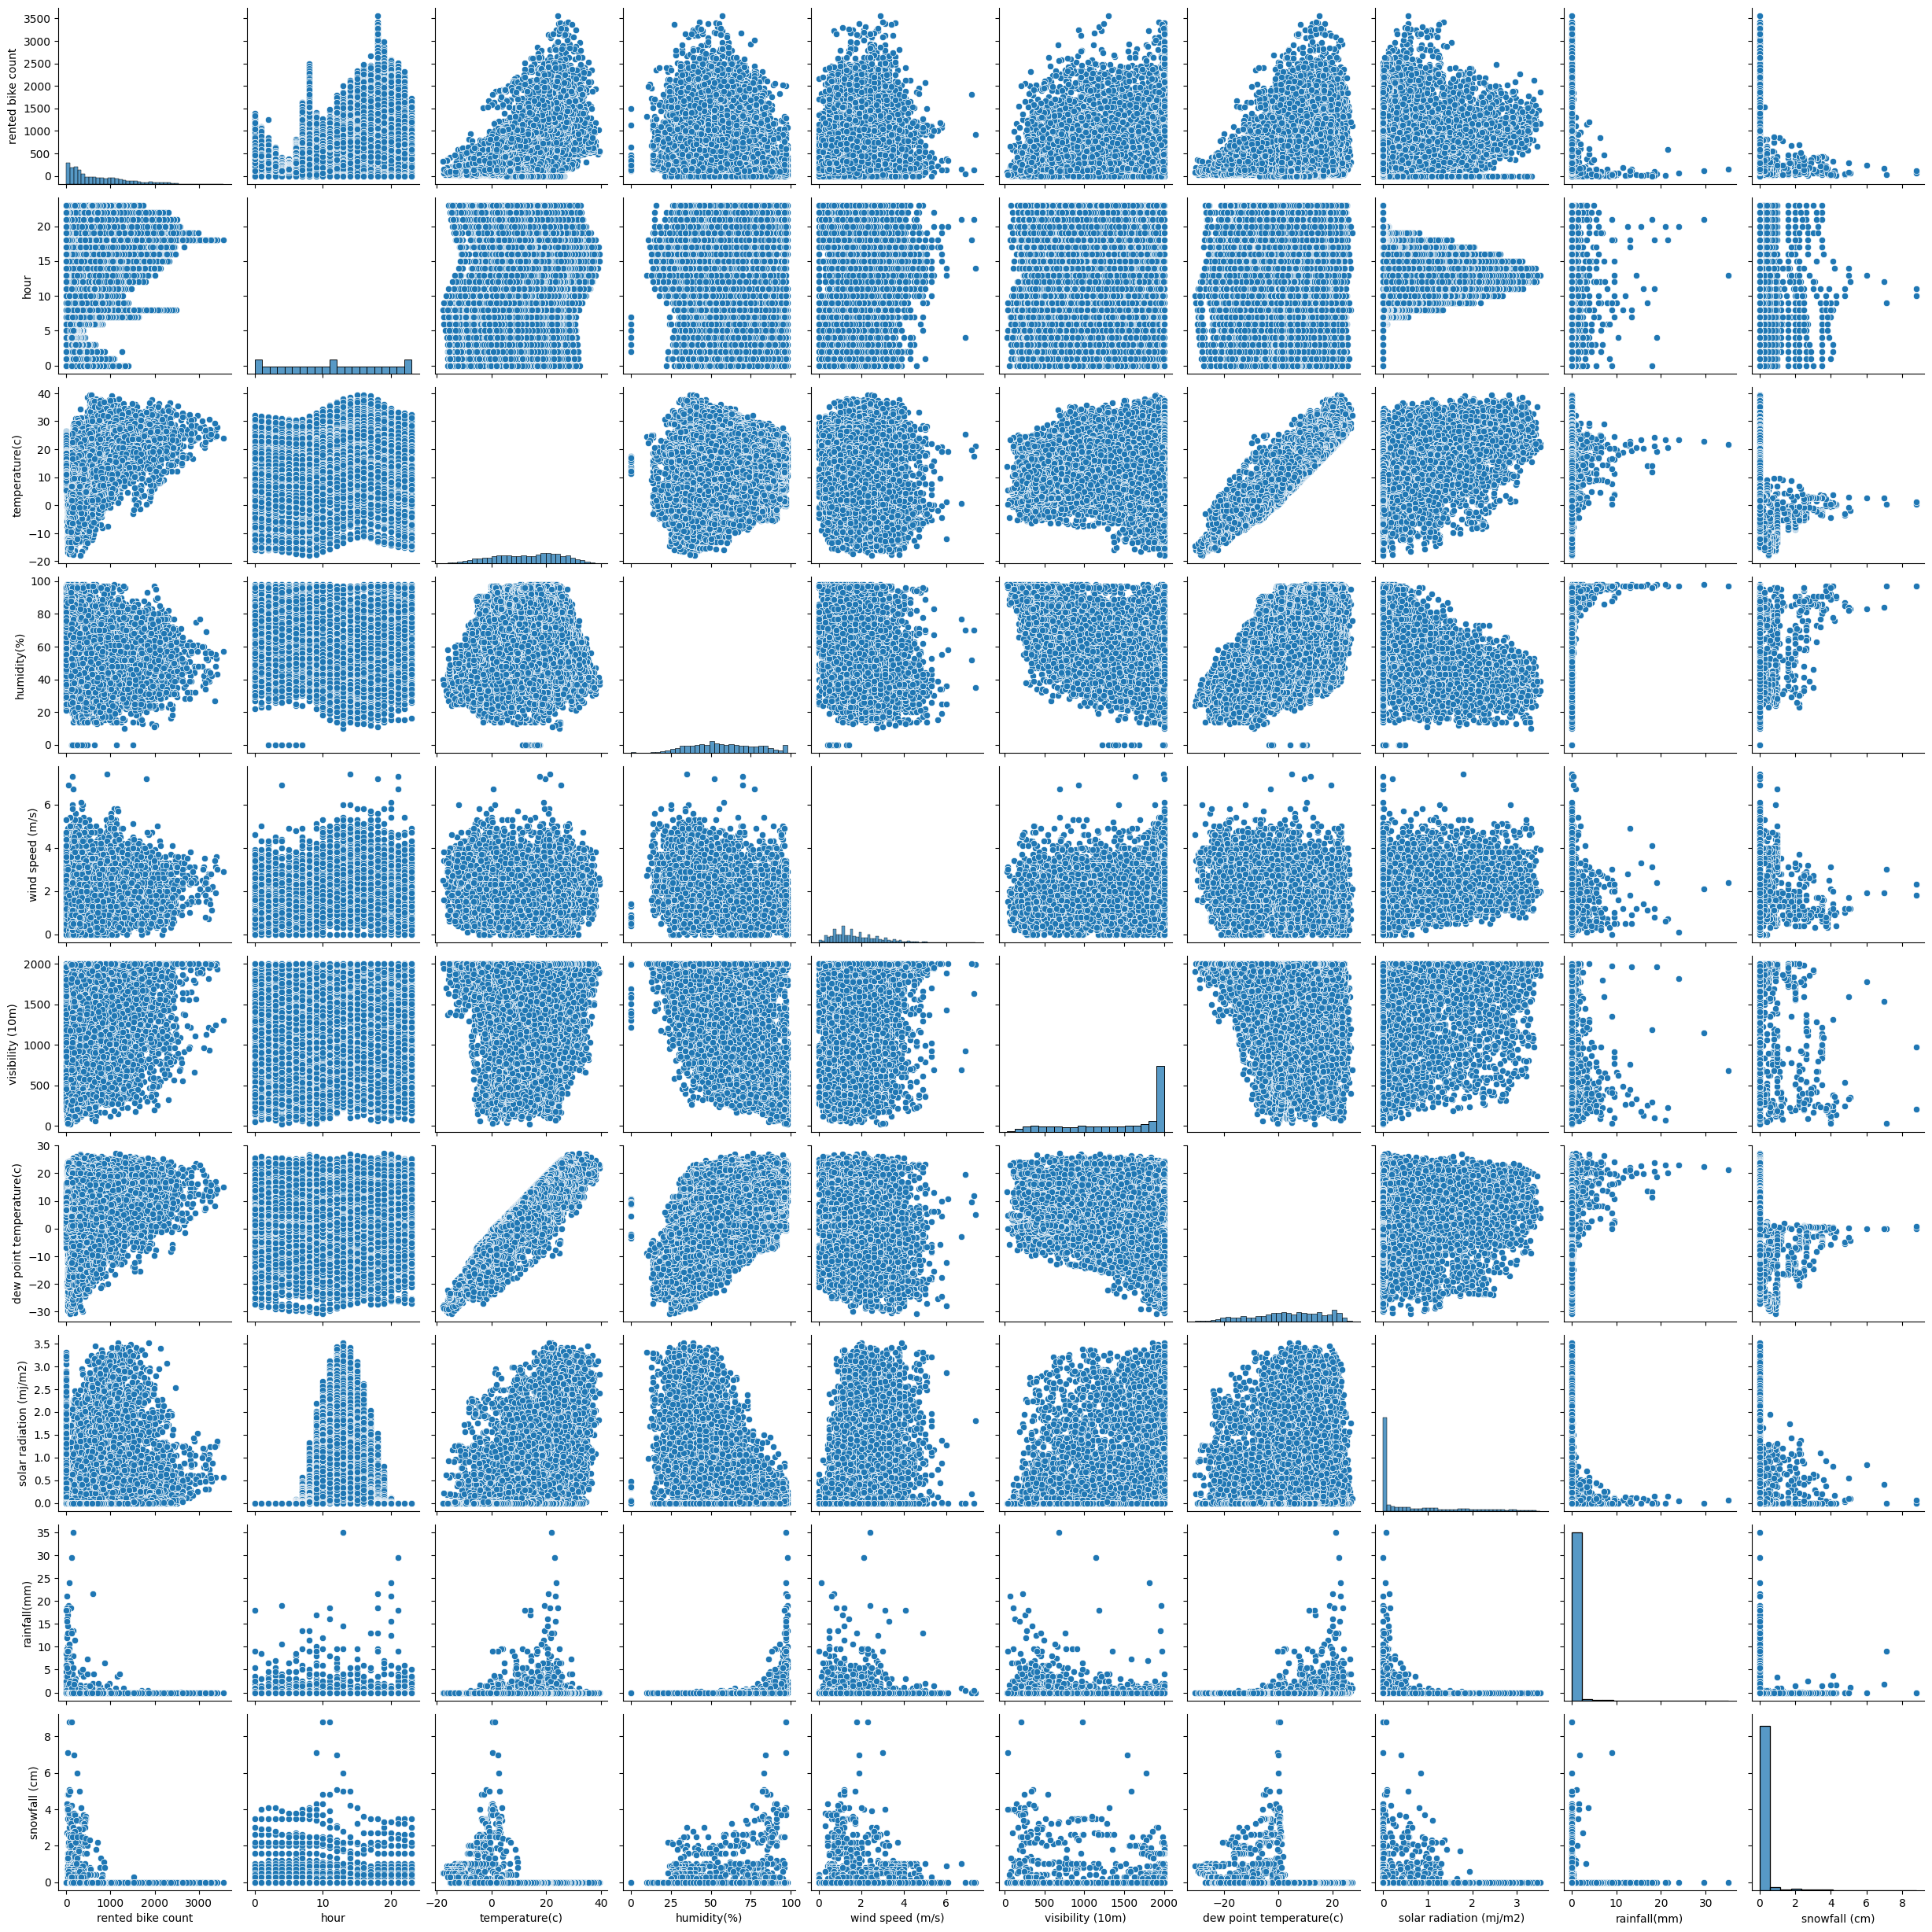

In [12]:
sns.pairplot(data,)

In [34]:
group_1=[target,'hour',
 'temperature(c)',
 'humidity(%)',
 'wind speed (m/s)',
 'visibility (10m)',]
group_2=[target,'dew point temperature(c)',
 'solar radiation (mj/m2)',
 'rainfall(mm)',
 'snowfall (cm)']

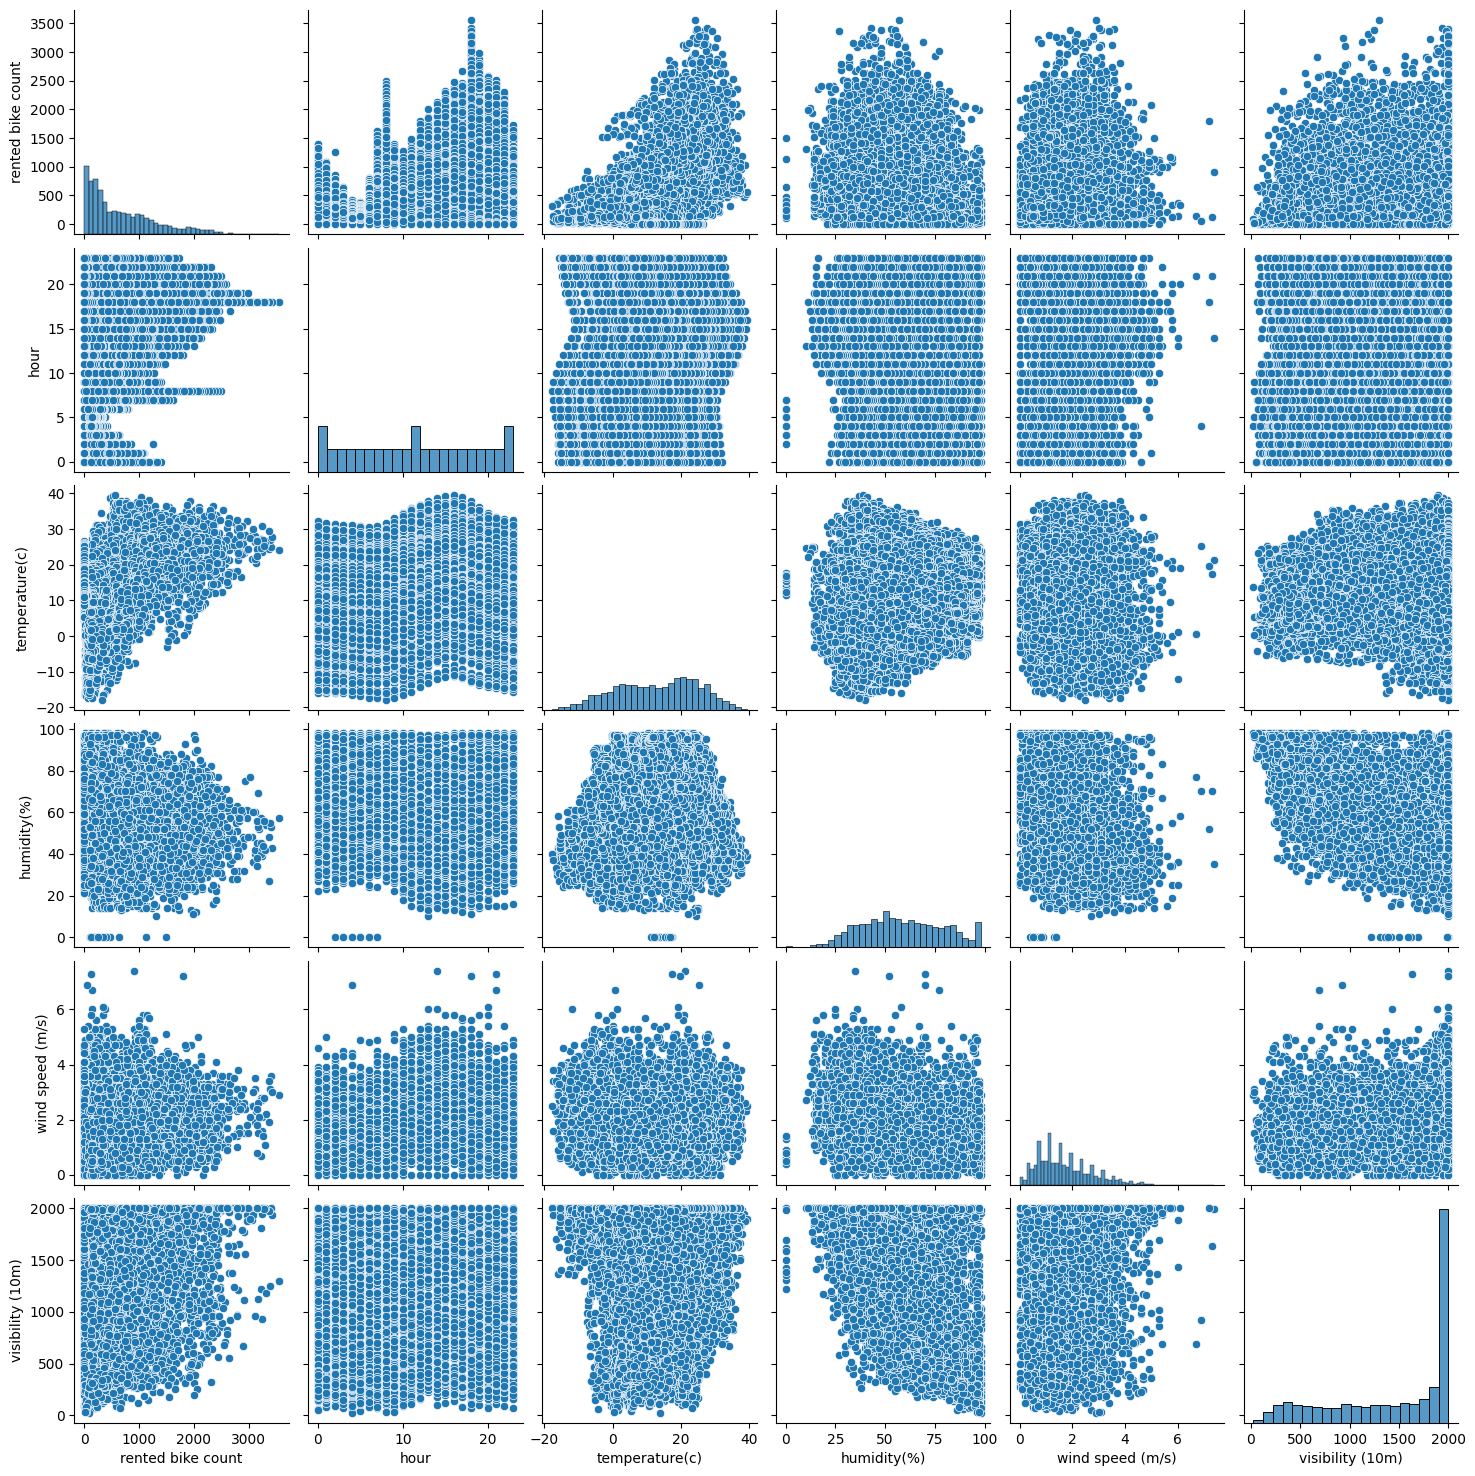

In [35]:
sns.pairplot(data[group_1],)

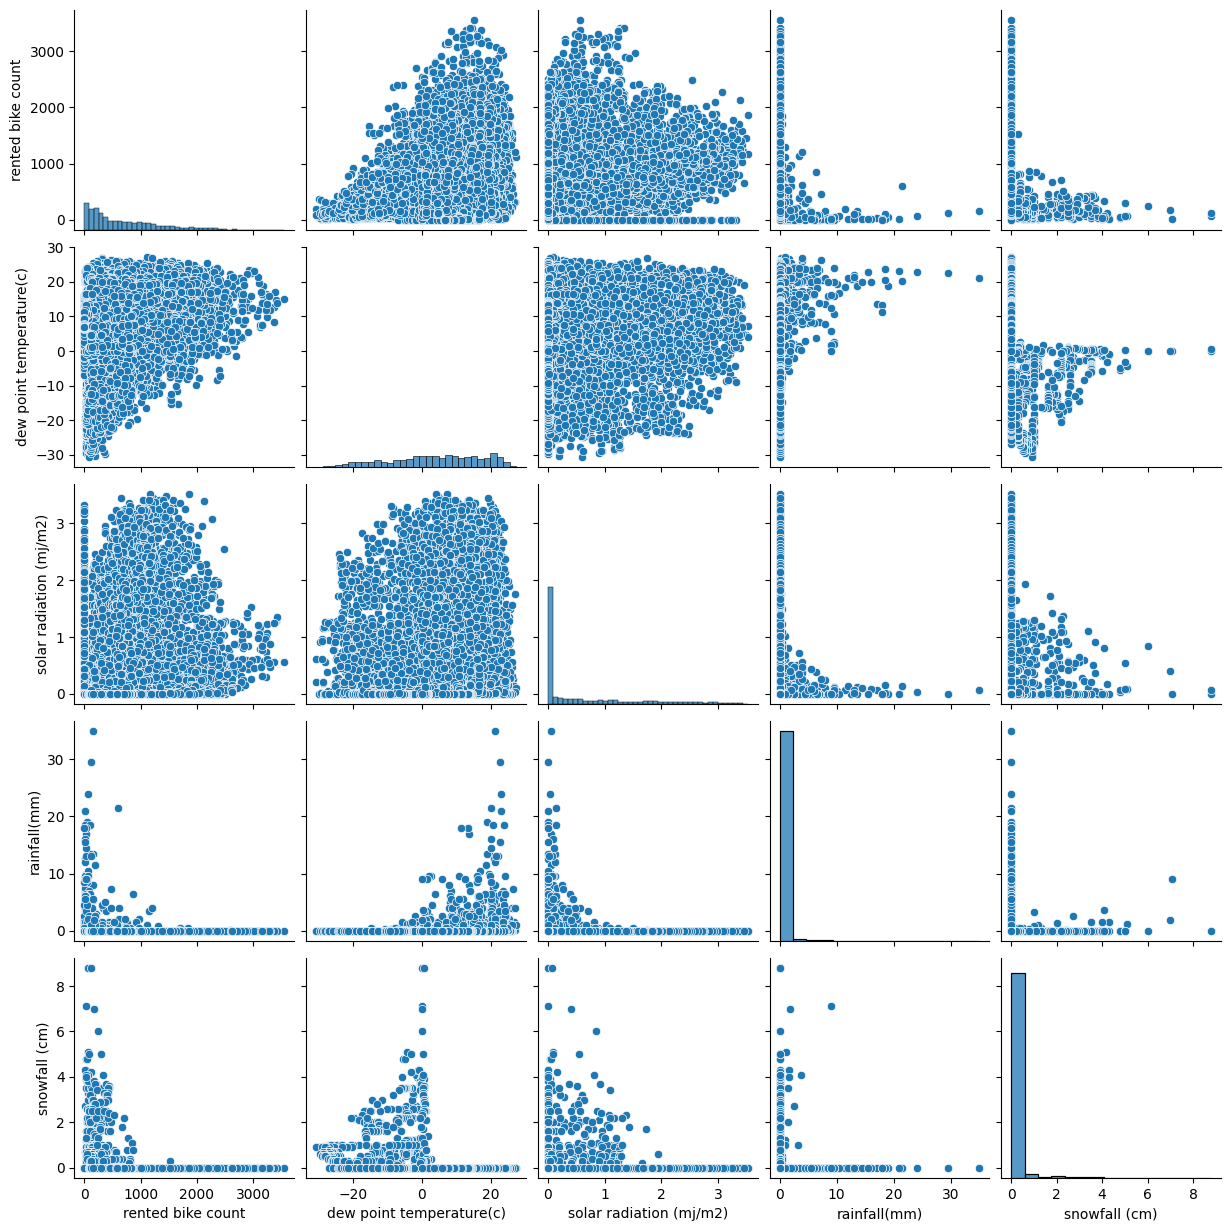

In [36]:
sns.pairplot(data[group_2],)

<Axes: xlabel='seasons', ylabel='rented bike count'>

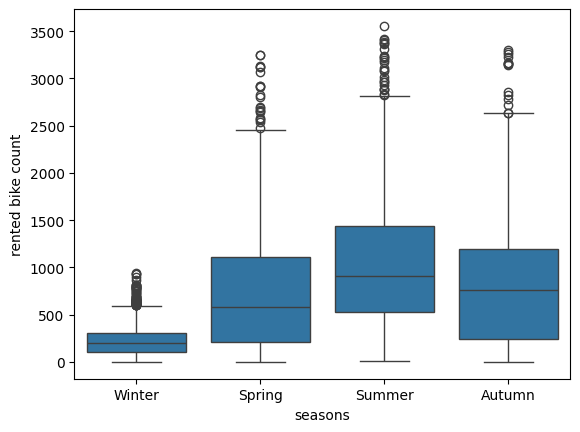

In [37]:
sns.boxplot(x='seasons',y=target,data=data)

<Axes: xlabel='holiday', ylabel='rented bike count'>

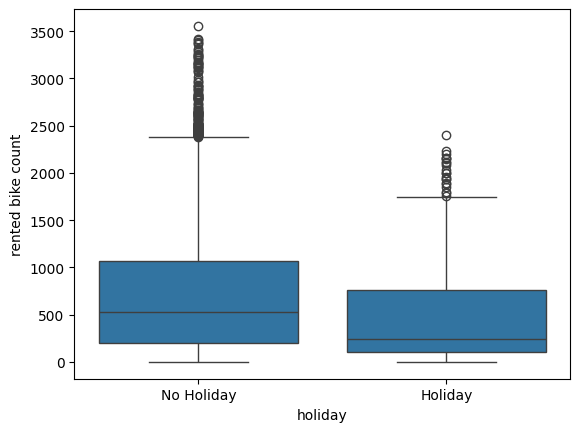

In [39]:
sns.boxplot(x='holiday',y=target,data=data)

<Axes: xlabel='functioning day', ylabel='rented bike count'>

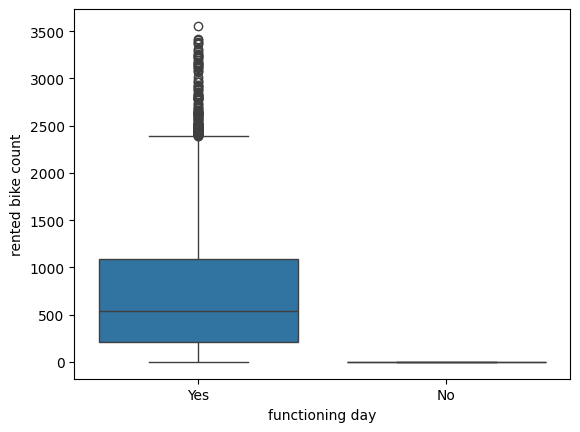

In [40]:
sns.boxplot(x='functioning day',y=target,data=data)

<Axes: xlabel='date', ylabel='rented bike count'>

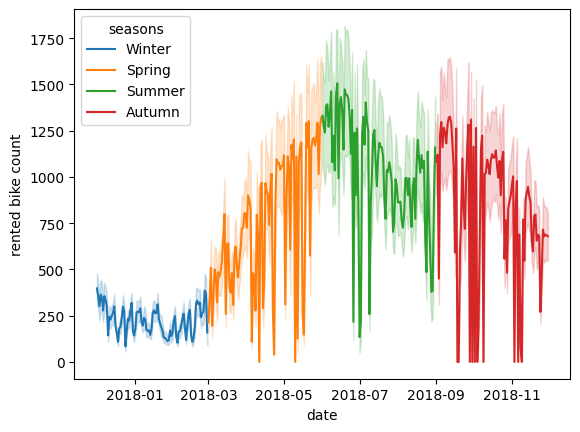

In [42]:
sns.lineplot(x='date',y=target,data=data,hue='seasons')

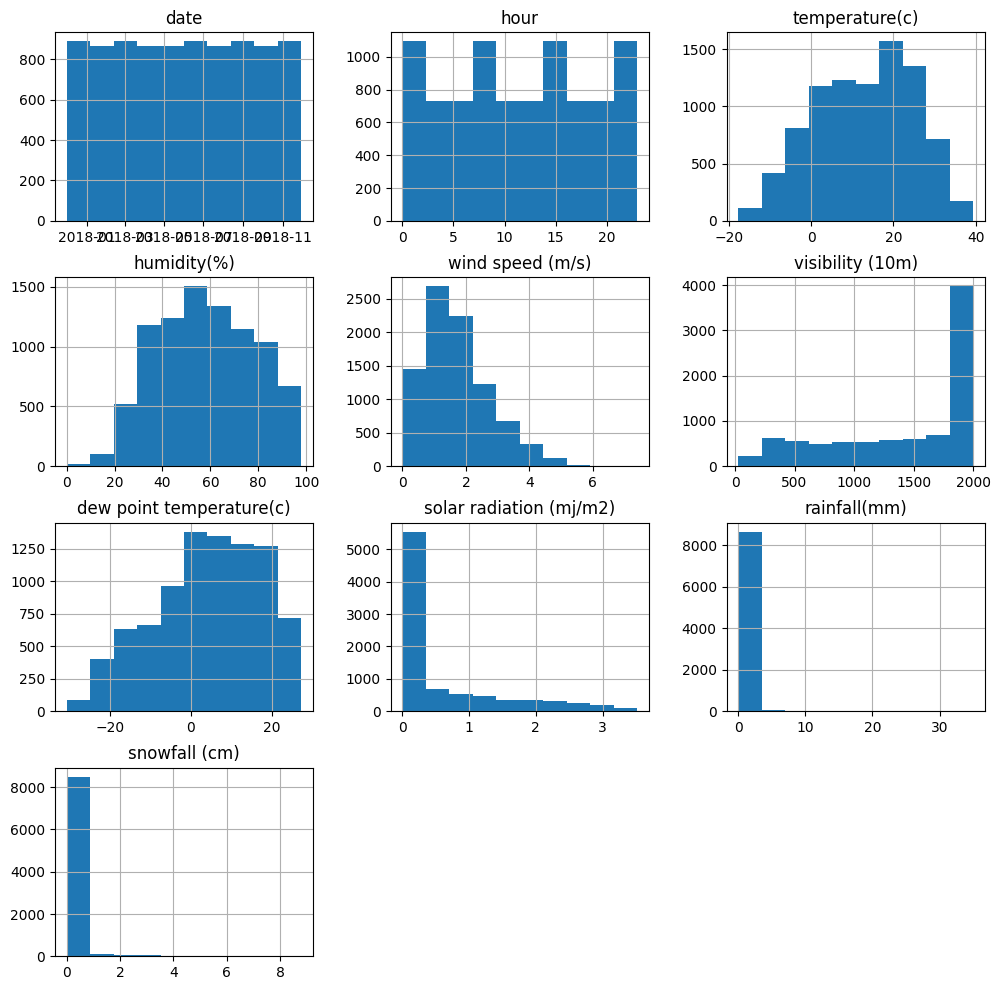

In [17]:
data[x_cols].hist(figsize=(12, 12))
plt.show()

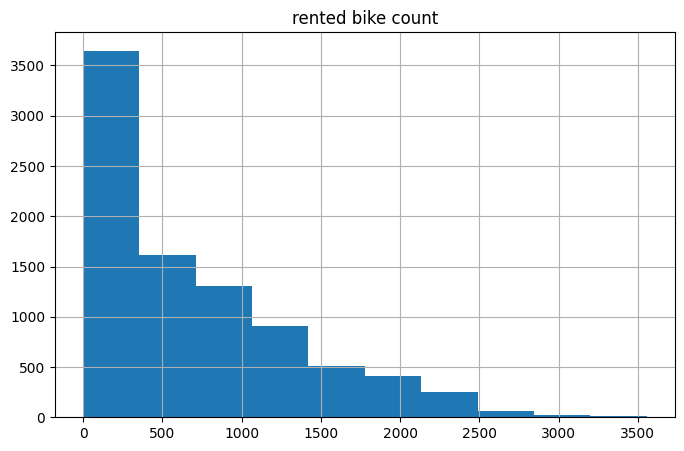

In [18]:
data[[target]].hist(figsize=(8, 5))
plt.show()

### Matriz de correlación

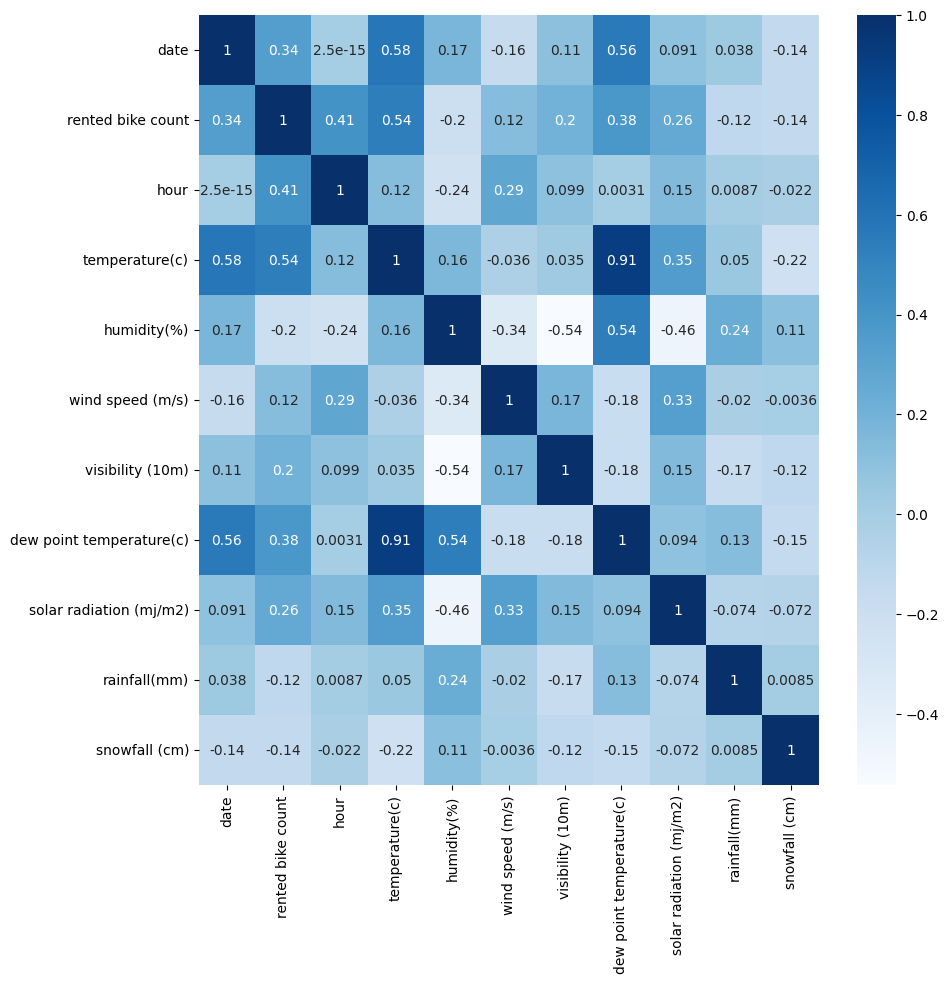

In [26]:
corr = data.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

<Axes: >

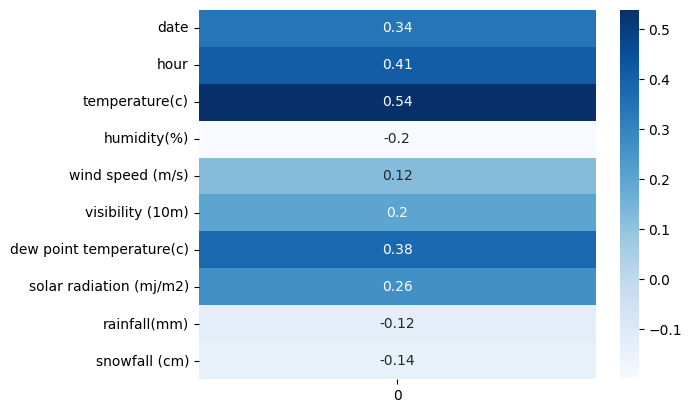

In [27]:
corrw = data.select_dtypes(exclude=['object']).drop([target], axis=1).corrwith(data[target])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

<Figure size 2500x1000 with 0 Axes>

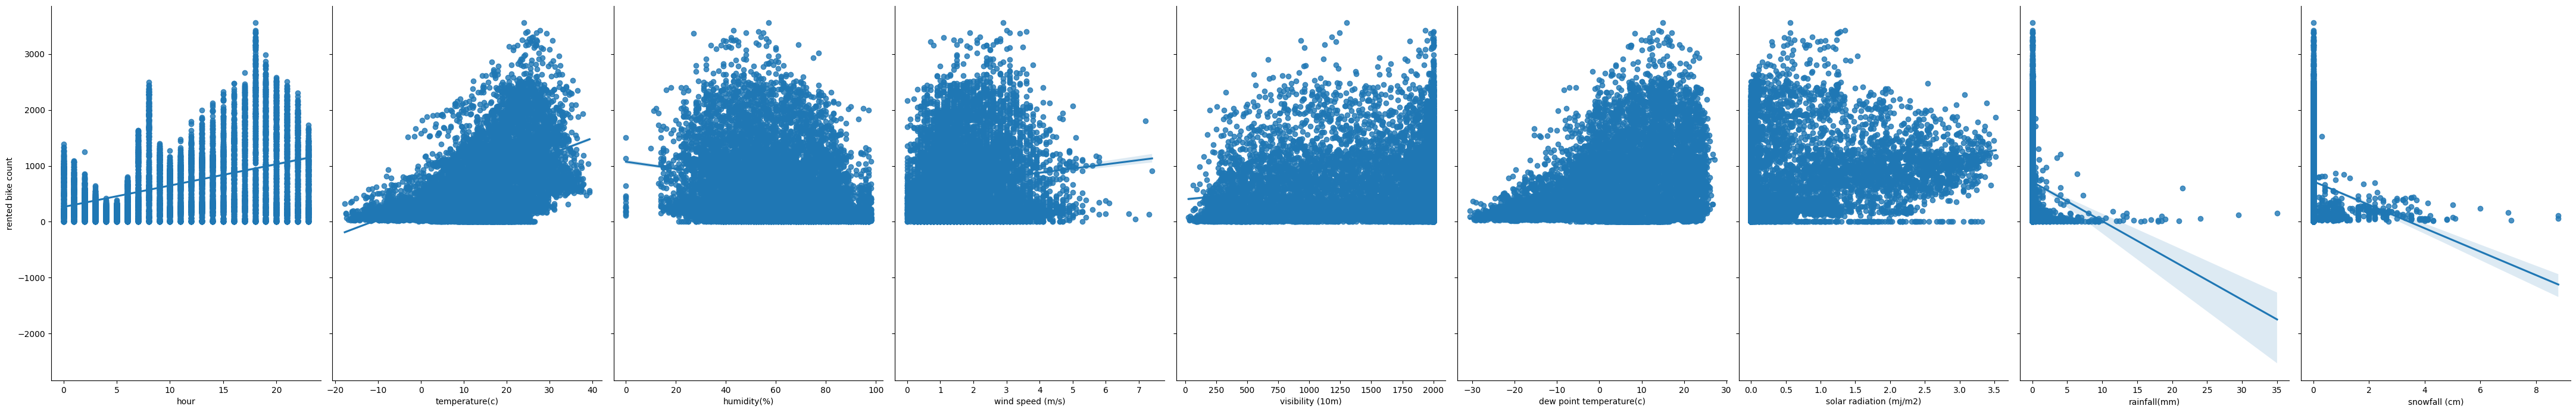

In [32]:
plt.figure(figsize=(25,10))
sns.pairplot(data=data, x_vars=['hour',
 'temperature(c)',
 'humidity(%)',
 'wind speed (m/s)',
 'visibility (10m)',
 'dew point temperature(c)',
 'solar radiation (mj/m2)',
 'rainfall(mm)',
 'snowfall (cm)'], y_vars=target, height=7, aspect=0.7, kind='reg')
plt.show()
